# ISLR Exercise solutions
This notebook provides python solutions to the exercises of the Book 'Introduction to Statistical Learning'.
This Notobook focuses on the numerical exercises, if python is used instead of R. For all other solutions, see  https://github.com/yahwes/ISLR

In [2]:
# import libs
import pandas as pd
import numpy as np

## Chapter 2
### Ex 7
#### a)

In [3]:
obs=[1, 2, 3, 4, 5, 6]
X1= [0, 2, 0, 0, -1, 1]
X2 = [3, 0, 1, 1, 0, 1]
X3 = [0, 0, 3, 2, 1, 1 ]
Y = ['red', 'red', 'red', 'green', 'green','red']

tab=pd.DataFrame({'obs':obs,'X1':X1,'X2':X2,'X3':X3,'Y':Y}).set_index('obs')
tab

,X1,X2,X3,Y
obs,,,,
1,0,3,0,red
2,2,0,0,red
3,0,1,3,red
4,0,1,2,green
5,-1,0,1,green
6,1,1,1,red


In [4]:
# get the distances from origin
test=[0, 0, 0]
dist=np.sqrt((tab.X1-test[0])**2+(tab.X2-test[1])**2+(tab.X3-test[2])**2)
tab['dist']=dist
tab

,X1,X2,X3,Y,dist
obs,,,,,
1,0,3,0,red,3.000000
2,2,0,0,red,2.000000
3,0,1,3,red,3.162278
4,0,1,2,green,2.236068
5,-1,0,1,green,1.414214
6,1,1,1,red,1.732051


#### b)

In [5]:
# get K-nearest predition of the origin.
k=1
tab.nsmallest(k,['dist']).loc[:,'Y'].value_counts().idxmax()

'green'

#### c)

In [6]:
# get K-nearest predition of the origin.
k=3
tab.nsmallest(k,['dist']).loc[:,'Y'].value_counts().idxmax()

'red'

### Applied
#### a)

In [7]:
# read in as csv, get it from http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
rfile= 'data/dataset-29177.csv'
collage=pd.read_csv(rfile)
collage.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


#### b)

In [8]:
collage=collage.reset_index().rename(columns={'index':'row.names'})
collage.head(3)

,row.names,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


#### c)

In [9]:
#c.i) use describe & info
collage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row.names    777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [10]:
collage.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


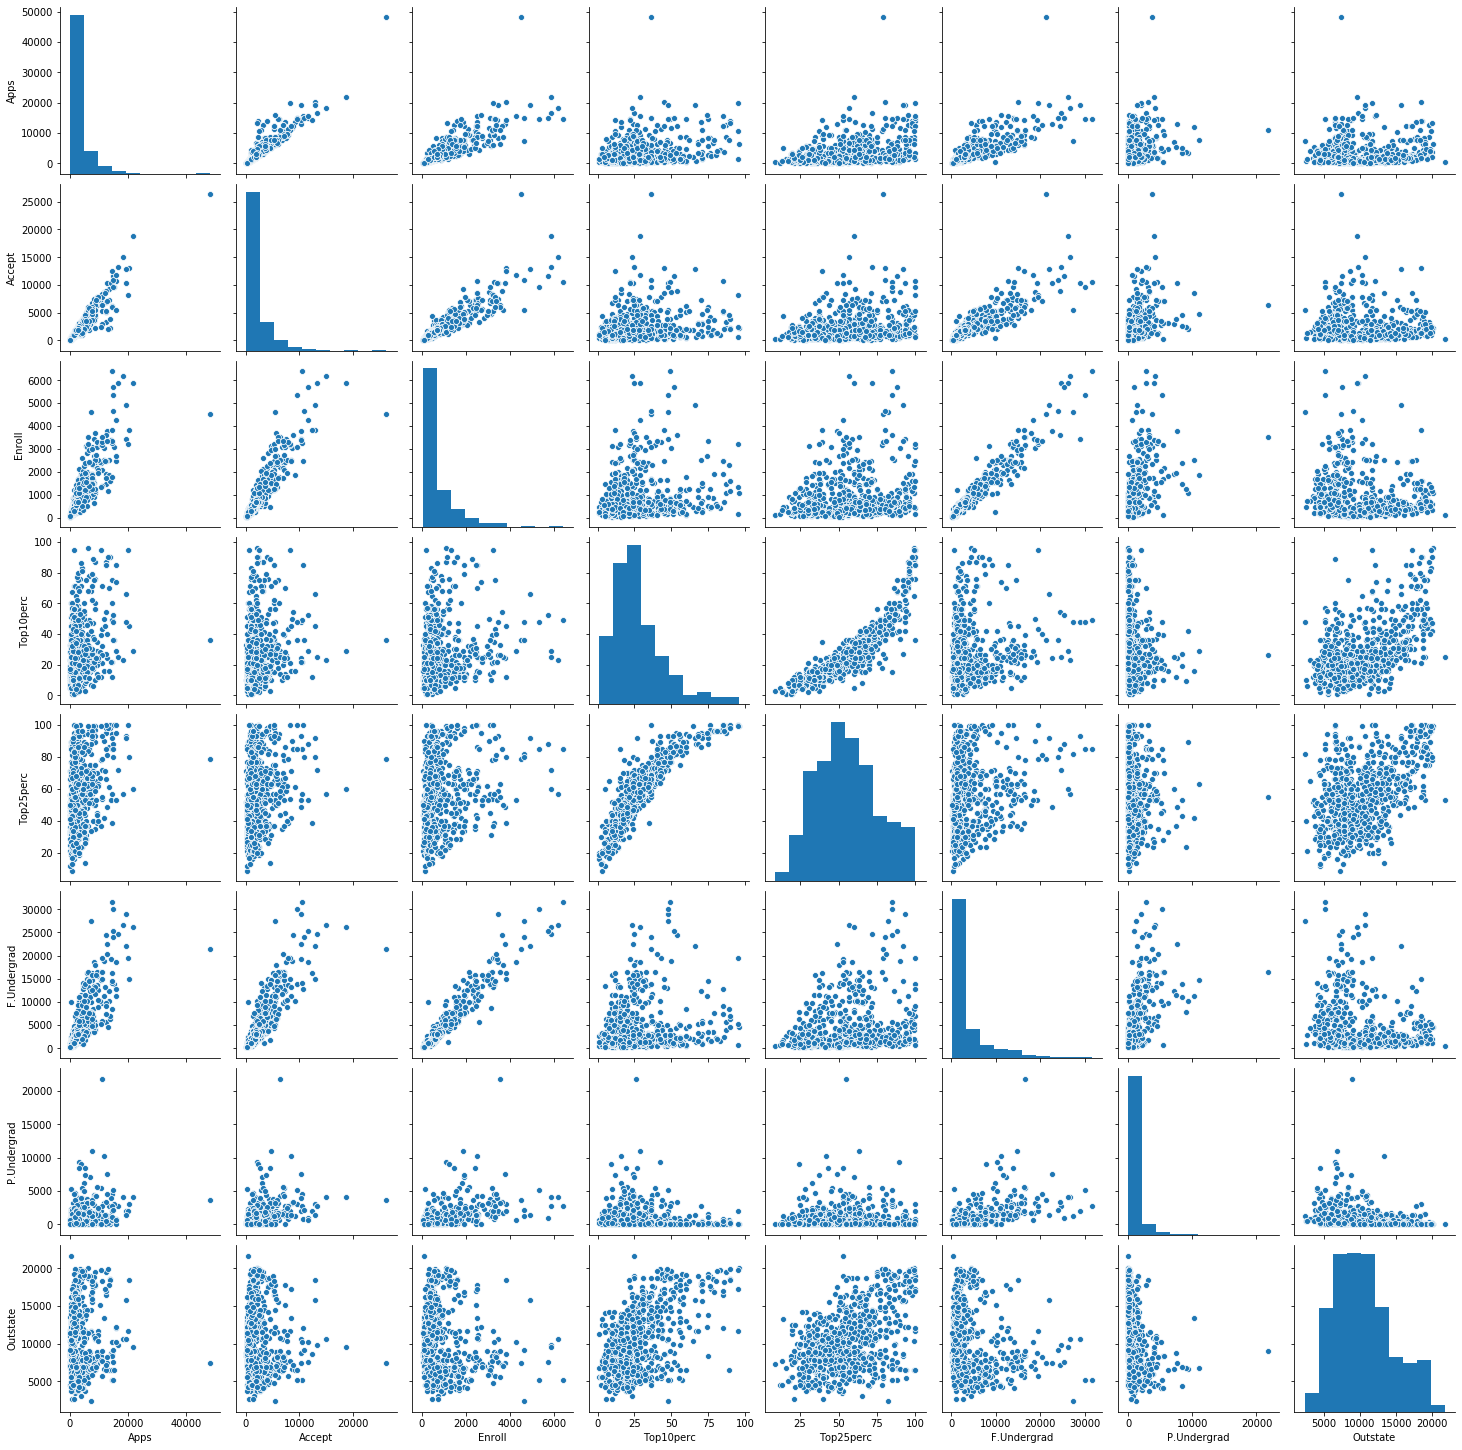

In [15]:
#c.ii) pairplots
import seaborn as sns
sns.pairplot(collage.iloc[:,1:10]) # beware of long computaion time

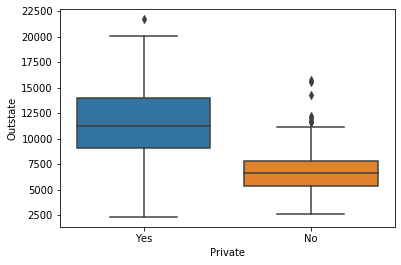

In [20]:
# c.iii) Otstate vs. Private
import matplotlib.pyplot as plt
sns.boxplot(x='Private', y="Outstate", data=collage)

In [48]:
# c.iv) Elite
collage['Elite']=pd.cut(collage['Top10perc'],[0,50,100],right=True,labels=[False,True]).astype(bool)
collage.describe().transpose() # python doesnt show categorical variables here

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [49]:
# number of Elite universities
collage['Elite'].sum()

78

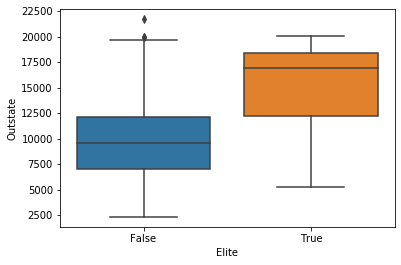

In [50]:
# Boxplot
sns.boxplot(data=collage,x='Elite',y='Outstate')

In [55]:
# c.v) a couple of histograms

# number of histograms
n_hist=5 

# factor of default number of bins for the plots
bin_factor=[0.1,0.3,1,3,10] 

# get numerical variables
num_vars=list(collage.describe().columns)

# get a random sample of the variables
import random as rn
rn.sample(num_vars,n_hist)

# iterate the variables and bin factors

['Terminal', 'Apps', 'Outstate', 'F.Undergrad', 'P.Undergrad']